# Telephonic Marketing Prediction 

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [2]:
#reading the data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#shape
train.shape, test.shape

((31647, 18), (13564, 17))

In [4]:
train.columns, test.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'))

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
#variable identification
train.dtypes                           #Type of the variables 

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# Univariate Analysis

In [8]:
#Tabular method Using the describe function on continuous variables
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


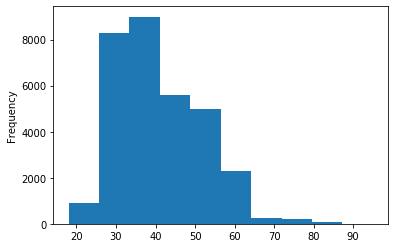

In [9]:
#plotting a histgram of the age variable
train["age"].plot.hist()

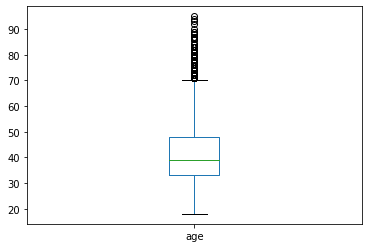

In [10]:
#plotting a boxplot of the age variable to identify outliers
train["age"].plot.box()

In [11]:
#univariate analysis for categorical variable
train["marital"].value_counts()/len(train["marital"])*100

married     60.337473
single      28.192246
divorced    11.470282
Name: marital, dtype: float64

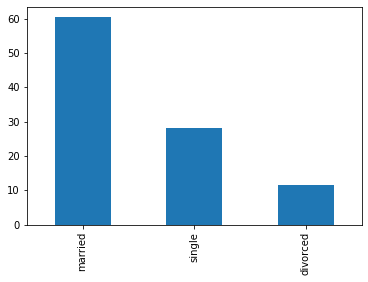

In [12]:
# In percentage
(train["marital"].value_counts()/len(train["marital"])*100).plot.bar()

In [13]:
#univariate analysis for education
train["education"].value_counts()/len(train["education"])*100

secondary    51.265523
tertiary     29.389832
primary      15.192593
unknown       4.152052
Name: education, dtype: float64

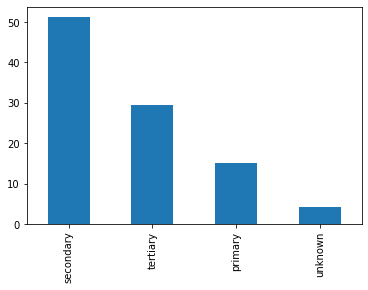

In [14]:
(train["education"].value_counts()/len(train["education"])*100).plot.bar()

In [15]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

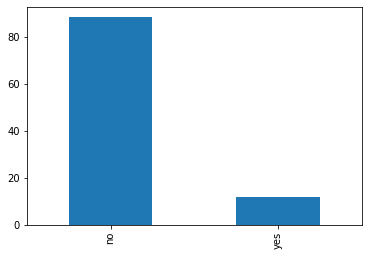

In [16]:
(train["subscribed"].value_counts()/len(train["subscribed"])*100).plot.bar()

In [17]:
#Univariate Analysis for Contact Types
train["contact"].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [18]:
# Normalize can be set to True to print proportions instead of number
train["contact"].value_counts(normalize=True)

cellular     0.645338
unknown      0.289980
telephone    0.064682
Name: contact, dtype: float64

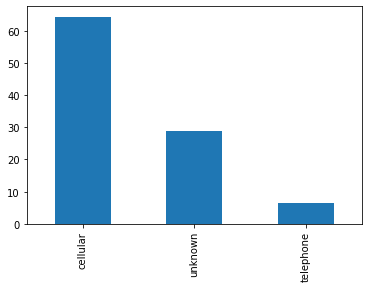

In [19]:
(train["contact"].value_counts()/len(train["contact"])*100).plot.bar()

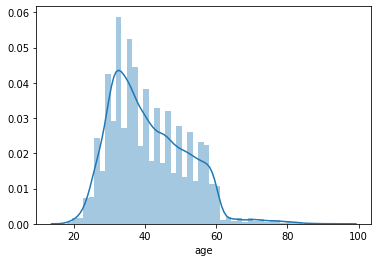

In [20]:
sb.distplot(train['age'])

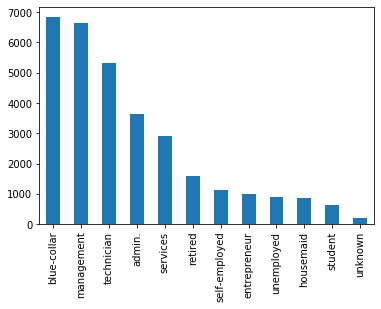

In [21]:
train['job'].value_counts().plot.bar()

# Bivariate Analysis

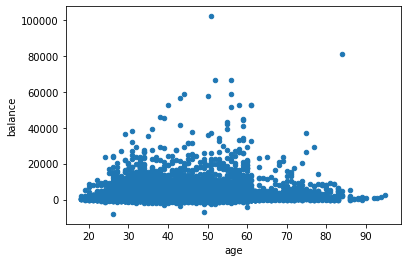

In [22]:
train.plot.scatter('age','balance')

In [23]:
train['age'].corr(train['balance'])

0.10324487428906881

In [24]:
pd.crosstab(train['education'],train['subscribed'])

subscribed,no,yes
education,,
primary,4381,427
secondary,14527,1697
tertiary,7886,1415
unknown,1138,176


In [25]:
pd.crosstab(train['marital'],train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [26]:
from scipy.stats import chi2_contingency

In [27]:
chi2_contingency(pd.crosstab(train['marital'],train['subscribed']))

(153.28022173639636,
 5.195445069769366e-34,
 2,
 array([[ 3203.87904067,   426.12095933],
        [16853.46288748,  2241.53711252],
        [ 7874.65807186,  1047.34192814]]))

In [28]:
job=pd.crosstab(train['job'],train['subscribed'])
job

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

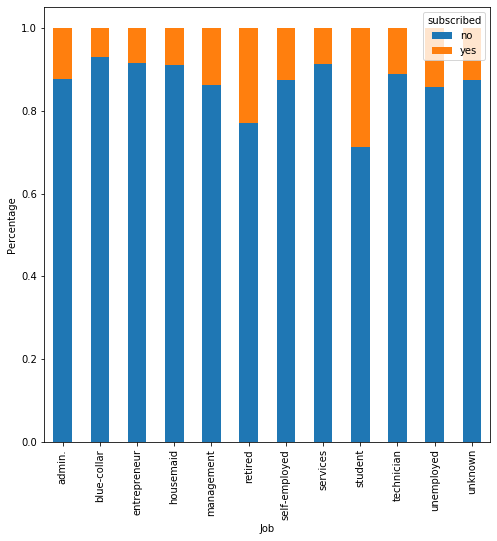

In [29]:
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [30]:
chi2_contingency(pd.crosstab(train['job'],train['subscribed']))


(588.7312904892925,
 3.6010336114362163e-119,
 11,
 array([[3204.76165197,  426.23834803],
        [6038.82655544,  803.17344456],
        [ 889.67219642,  118.32780358],
        [ 771.40228142,  102.59771858],
        [5859.65646033,  779.34353967],
        [1389.2301956 ,  184.7698044 ],
        [ 991.1724966 ,  131.8275034 ],
        [2562.22062123,  340.77937877],
        [ 560.45817929,   74.54182071],
        [4684.01820078,  622.98179922],
        [ 798.7632319 ,  106.2367681 ],
        [ 181.81792903,   24.18207097]]))

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

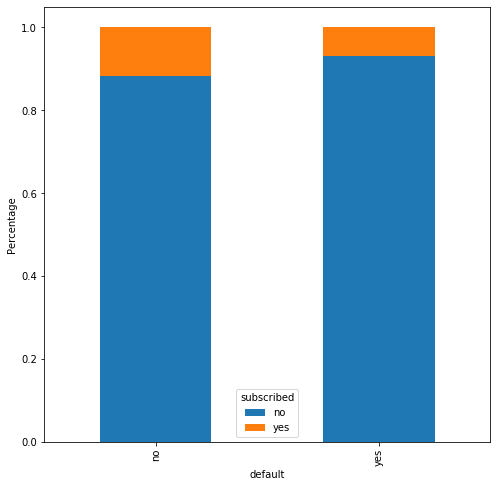

In [31]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [32]:
#convert target variable into numerical value
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [33]:
train['subscribed'].head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

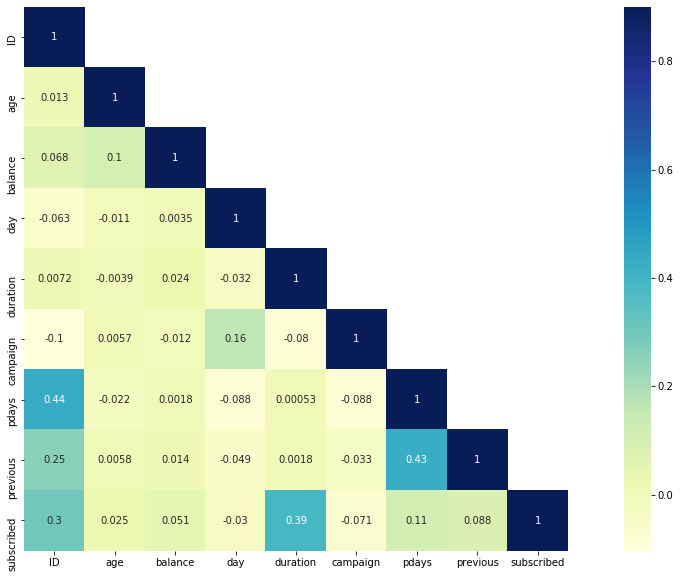

In [34]:
#correlation
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Here, Duration of call highly correlated with target.

In [35]:
#identifying null value or missing valules
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Model Building

In [36]:
# Split a training data into train and validation set 20%- validation data
target=train['subscribed']
train = train.drop('subscribed',1)

In [37]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [38]:
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Build model using Logistic Regression. Logistic Regression is used for Classification problem. 

# Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# create object
lgr=LogisticRegression()

In [43]:
# fitting model for train data
lgr.fit(X_train,y_train)

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#make prediction by validation set
prediction=lgr.predict(X_val)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
#Performace checking 
from sklearn.metrics import accuracy_score

In [46]:
#calculate the accuracy score using y_val
accuracy_score(y_val, prediction)

0.9048973143759874


# Decision Tree

In [55]:
#value count for test- dependent variable
y_val.value_counts()

0    5608
1     722
Name: subscribed, dtype: int64

In [57]:
#value count for train - dependent variable
y_train.value_counts()

0    22324
1     2993
Name: subscribed, dtype: int64

In [58]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree=DecisionTreeClassifier()

In [60]:
#fitting the model using fit function
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
prediction=dtree.predict(X_val)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
#score calculation
accuracy_score(y_val,prediction)

0.8843601895734597

Let's now make the prediction on test data

In [73]:
test=pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [75]:
test_prediction=dtree.predict(test)
test_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

save this predictionn result into csv file

In [76]:
submit=pd.DataFrame()

In [77]:
submit['ID']=test['ID']
submit['subscribed']=test_prediction

In [78]:
submit.head()

,ID,subscribed
0,38441,0
1,40403,0
2,3709,0
3,37422,0
4,12527,0


convert 0 and 1 into targrt variable no and yes

In [80]:
submit['subscribed'].replace(0,'no',inplace=True)
submit['subscribed'].replace(1,'yes',inplace=True)
submit.head()

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no


Convert this submit Dataframe into csv file

In [81]:
submit.to_csv('result.csv',header=True,index=False)

Accuracy score of test data is 89%.